# **Take-home Examination: IST 322**

## **SETUP and ENVIRONEMNT INITIALIZATION**

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Set base path
base_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini'
data_path = os.path.join(base_path, 'data')
output_path = os.path.join(base_path, 'outputs')

# Create directories if not exist
os.makedirs(data_path, exist_ok=True)
os.makedirs(output_path, exist_ok=True)

print("Drive mounted and folders ready.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive mounted and folders ready.


In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 1.3 MB/s eta 0:00:00


In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/IST322_TakeHome_Rohini/


/content/drive/MyDrive/IST322_TakeHome_Rohini


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import nltk
import string
import re
import contractions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK assets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', 50)

print("Environment setup complete and Drive mounted successfully.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Environment setup complete and Drive mounted successfully.


### **Load and verify datasets**

In [ ]:
status_df = pd.read_csv('Status+Updates.csv')
open_df = pd.read_csv('Openness_w_profile_w_activity.csv')
liwc_df = pd.read_csv('LIWC.csv')

print("Status Updates shape:", status_df.shape)
print("Openness Profile shape:", open_df.shape)
print("LIWC shape:", liwc_df.shape)

print("\nStatus Updates columns:")
print(status_df.columns.tolist())

print("\nOpenness Profile columns:")
print(open_df.columns.tolist())

print("\nLIWC columns:")
print(liwc_df.columns.tolist())


Status Updates shape: (3000, 2)
Openness Profile shape: (3000, 14)
LIWC shape: (3000, 93)

Status Updates columns:
['userid', 'message']

Openness Profile columns:
['userid', 'ope', 'ope_hl_bol', 'gender', 'age', 'locale', 'WC', 'n_like', 'n_status', 'n_event', 'n_group', 'n_work', 'n_education', 'n_tags']

LIWC columns:
['userid', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic', 'function.', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare', 'interrog', 'number', 'quant', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend', 'female', 'male', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'percept', 'see', 'hear', 'feel', 'bio', 'body', 'health', 'sexual', 'ingest', 'drives', 'affiliation', 'achieve', 'power', 'reward', 'risk', 'focuspast', 'focuspresent', 'focusfuture', 'relativ', 'motion', 'space', 'time', 'work', 'l

# **Part 1: Text Preprocessing**

## **PART 1a: TOKENIZATION & NORMALIZATION**

### **Step 1: Setup an cleaning function**

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag
import string
import re

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Helper: map POS tag to lemmatizer tag
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return 'a'  # adjective
    elif tag.startswith('V'):
        return 'v'  # verb
    elif tag.startswith('N'):
        return 'n'  # noun
    elif tag.startswith('R'):
        return 'r'  # adverb
    else:
        return 'n'  # default noun

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
punct = set(string.punctuation)

def preprocess_text(text):
    # Lowercase everything
    text = str(text).lower()

    # Expand contractions (e.g., "can't" → "cannot")
    import contractions
    text = contractions.fix(text)

    # Remove punctuation, digits, and special symbols (even inside words)
    text = re.sub(r'[^a-z\s]', ' ', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords and tokens shorter than 2 chars
    tokens = [t for t in tokens if t not in stop_words and len(t) > 1]

    # POS tagging and lemmatization
    tagged = pos_tag(tokens)
    clean_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in tagged]

    return clean_tokens


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### **Step 2: Apply to the dataset**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

# Fix NLTK internal mapping if needed
from nltk.data import find
try:
    find('taggers/averaged_perceptron_tagger_eng')
except:
    nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [ ]:
status_df['tokens_raw'] = status_df['message'].apply(lambda x: word_tokenize(str(x)))
status_df['tokens_clean'] = status_df['message'].apply(preprocess_text)
status_df['raw_length'] = status_df['tokens_raw'].apply(len)
status_df['clean_length'] = status_df['tokens_clean'].apply(len)
status_df[['message', 'tokens_raw', 'tokens_clean']].head(3)


,message,tokens_raw,tokens_clean
0,"is still pissed that Eminem wasnt in the official Airplanes recording and mv.\tis chillin' like a villain! ""Livah."" - omgpop Repomen ad.\tI thought about putting up a cartoon character as my profi...","[is, still, pissed, that, Eminem, wasnt, in, the, official, Airplanes, recording, and, mv, ., is, chillin, ', like, a, villain, !, ``, Livah, ., '', -, omgpop, Repomen, ad, ., I, thought, about, p...","[still, piss, eminem, official, airplane, record, mv, chillin, like, villain, livah, omgpop, repomen, ad, think, put, cartoon, character, profile, picture, realize, would, absolutely, nothing, sai..."
1,is singing today and is a little nurvous . please pray for me. :)\tis sending thoughts and prayers out to her dear friend Crystal Long. She lost her husband today due to some heart issues. Please ...,"[is, singing, today, and, is, a, little, nurvous, ., please, pray, for, me, ., :, ), is, sending, thoughts, and, prayers, out, to, her, dear, friend, Crystal, Long, ., She, lost, her, husband, tod...","[sing, today, little, nurvous, please, pray, send, thought, prayer, dear, friend, crystal, long, lose, husband, today, due, heart, issue, please, keep, three, beautiful, kid, thought, prayer, hear..."
2,I had a wonderful day at Anderson I am beat but it is a good beat. It is so important to feel needed. I thank God everyday for the students and faculty at Anderson I especially want to thank...,"[I, had, a, wonderful, day, at, Anderson, I, am, beat, but, it, is, a, good, beat, ., It, is, so, important, to, feel, needed, ., I, thank, God, everyday, for, the, students, and, faculty, at, And...","[wonderful, day, anderson, beat, good, beat, important, feel, need, thank, god, everyday, student, faculty, anderson, especially, want, thank, m, hood, best, principal, world, would, never, dream,..."


## **PART 1(b): Summary Table for First 5 Users**

In [ ]:
import nltk
nltk.download('words')

from nltk.corpus import words
english_vocab = set(w.lower() for w in words.words())

# ---- Functions from L1.5 Simple Text Analysis ----
def lexical_diversity(tokens):
    """Compute lexical diversity = len(tokens)/len(set(tokens))"""
    return len(tokens) / len(set(tokens)) if len(tokens) > 0 else 0

def potential_misspells(tokens):
    """Find tokens not in English vocabulary"""
    return [t for t in tokens if t not in english_vocab]

# ---- Compute metrics for first 5 messages ----
subset = status_df.head(5).copy()
subset['Message_Length'] = subset['tokens_raw'].apply(len)
subset['Cleaned_Length'] = subset['tokens_clean'].apply(len)
subset['Lexical_Diversity'] = subset['tokens_clean'].apply(lexical_diversity)
subset['Potential_Misspells'] = subset['tokens_clean'].apply(lambda x: potential_misspells(x)[:10])  # show up to 10

# ---- Display output table ----
subset[['message', 'Message_Length', 'Cleaned_Length', 'Lexical_Diversity', 'Potential_Misspells']]


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


,message,Message_Length,Cleaned_Length,Lexical_Diversity,Potential_Misspells
0,"is still pissed that Eminem wasnt in the official Airplanes recording and mv.\tis chillin' like a villain! ""Livah."" - omgpop Repomen ad.\tI thought about putting up a cartoon character as my profi...",157,71,1.028986,"[eminem, mv, chillin, livah, omgpop, repomen, sais, dooo, keller, hipz]"
1,is singing today and is a little nurvous . please pray for me. :)\tis sending thoughts and prayers out to her dear friend Crystal Long. She lost her husband today due to some heart issues. Please ...,2482,1029,2.266520,"[nurvous, kid, everytime, ison, cemo, lexington, chasitiy, yay, morehead, lol]"
2,I had a wonderful day at Anderson I am beat but it is a good beat. It is so important to feel needed. I thank God everyday for the students and faculty at Anderson I especially want to thank...,672,278,1.510870,"[thru, kid, okay, goodbye, proud, proud]"
3,"i like it on the floor! :)\ti hope you miss me..just a little bit, so that maybe i have a reason to come back :)\ti came to win\ti really need to work on this thing they call life because right no...",685,268,1.480663,"[fuck, bullshit, shit, boyslikegirls, hannah, itty, starbucks, hang, dawgs, soo]"
4,is about to make some moolah!\tI need to start playing Mafia Wars again.\tI love Darth Vader and the force within him!\tI hate when people say dumb stuff just because.\tI have a problem with profe...,1453,593,1.552356,"[moolah, mafia, darth, vader, crossfit, obama, lz, granderson, thor, mom]"


In [ ]:
#sanity check for cleanup
import re
status_df['tokens_clean'].apply(lambda toks: any(re.search(r'[^a-z]', t) for t in toks)).sum()


np.int64(0)

# **Part 2: Feature Engineering**

## **Step 2.1 — TF-IDF Vectors**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine all cleaned tokens per user into one document string
user_texts = status_df.groupby('userid')['tokens_clean'].apply(lambda x: ' '.join([' '.join(tokens) for tokens in x]))

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(user_texts)

print("TF-IDF matrix shape:", tfidf_matrix.shape)


TF-IDF matrix shape: (3000, 5000)


In [ ]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=user_texts.index, columns=tfidf_vectorizer.get_feature_names_out())


In [ ]:
#save to drive
import pickle

# Save TF-IDF matrix
with open(os.path.join(output_path, 'tfidf_vectors.pkl'), 'wb') as f:
    pickle.dump(tfidf_df, f)
print("TF-IDF features saved to Drive.")


TF-IDF features saved to Drive.


## **Step 2.2 — GloVe Pre-trained 100d Vectors**

In [ ]:
#save to drive
from google.colab import drive
drive.mount('/content/drive')

glove_file = '/content/drive/MyDrive/IST322_TakeHome_Rohini/glove.twitter.27B.100d.txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np

# Load GloVe 100d Twitter vectors
glove_file = '/content/drive/MyDrive/IST322_TakeHome_Rohini/glove.twitter.27B.100d.txt'
embeddings_index = {}

with open(glove_file, 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Loaded %d word vectors." % len(embeddings_index))

# Function to average word embeddings for each document
def get_glove_vector(tokens):
    vectors = [embeddings_index[w] for w in tokens if w in embeddings_index]
    if len(vectors) == 0:
        return np.zeros(100)
    return np.mean(vectors, axis=0)

# Compute document-level vectors per user
user_vectors = status_df.groupby('userid')['tokens_clean'].apply(
    lambda docs: get_glove_vector([word for tokens in docs for word in tokens])
)

glove_df = pd.DataFrame(user_vectors.tolist(), index=user_vectors.index)
print("GloVe feature matrix shape:", glove_df.shape)

# Save to Drive for backup
glove_df.to_csv('/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/glove_vectors.csv', index=True)
print("💾 Saved GloVe vectors to Drive successfully!")


Loaded 1193514 word vectors.
GloVe feature matrix shape: (3000, 100)
💾 Saved GloVe vectors to Drive successfully!


In [ ]:
#save to drive
with open(os.path.join(output_path, 'glove_vectors.pkl'), 'wb') as f:
    pickle.dump(glove_df, f)
print("GloVe embeddings saved to Drive.")

GloVe embeddings saved to Drive.


## **Step 2.3 — Longformer Vectors**

In [ ]:
from transformers import LongformerTokenizer, LongformerModel
import torch
import pandas as pd
import numpy as np
import gc

# Use a smaller Longformer
tokenizer = LongformerTokenizer.from_pretrained("allenai/longformer-base-4096")
model = LongformerModel.from_pretrained("allenai/longformer-base-4096")
model.eval().to("cuda" if torch.cuda.is_available() else "cpu")

# Helper to extract mean embeddings safely
def get_longformer_vector(text):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        max_length=512
    ).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    vector = outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
    torch.cuda.empty_cache()
    gc.collect()
    return vector

# Save progress incrementally
output_path = "/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/longformer_vectors_partial.csv"

batch_size = 100
user_vectors = []
user_ids = []

user_texts = status_df.groupby("userid")["message"].apply(lambda x: " ".join(x))

for i, (uid, text) in enumerate(user_texts.items()):
    vec = get_longformer_vector(text)
    user_vectors.append(vec)
    user_ids.append(uid)

    # Every 100 users, save progress to Drive
    if (i + 1) % batch_size == 0:
        temp_df = pd.DataFrame(user_vectors, index=user_ids)
        temp_df.to_csv(output_path, mode="a", header=not bool(i), index=True)
        print(f"Saved batch {i+1} to Drive")
        user_vectors, user_ids = [], []  # free memory
        gc.collect()

# Save remaining
if user_vectors:
    final_df = pd.DataFrame(user_vectors, index=user_ids)
    final_df.to_csv(output_path, mode="a", header=False, index=True)
    print("All batches saved!")

print("Longformer feature extraction complete!")


Saved batch 100 to Drive
Saved batch 200 to Drive
Saved batch 300 to Drive
Saved batch 400 to Drive
Saved batch 500 to Drive
Saved batch 600 to Drive
Saved batch 700 to Drive
Saved batch 800 to Drive
Saved batch 900 to Drive
Saved batch 1000 to Drive
Saved batch 1100 to Drive
Saved batch 1200 to Drive
Saved batch 1300 to Drive
Saved batch 1400 to Drive
Saved batch 1500 to Drive
Saved batch 1600 to Drive
Saved batch 1700 to Drive
Saved batch 1800 to Drive
Saved batch 1900 to Drive
Saved batch 2000 to Drive
Saved batch 2100 to Drive
Saved batch 2200 to Drive
Saved batch 2300 to Drive
Saved batch 2400 to Drive
Saved batch 2500 to Drive
Saved batch 2600 to Drive
Saved batch 2700 to Drive
Saved batch 2800 to Drive
Saved batch 2900 to Drive
Saved batch 3000 to Drive
Longformer feature extraction complete!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls -lh /content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/


total 150M
-rw------- 1 root root 6.0M Nov  3 23:15 glove_vectors.csv
-rw------- 1 root root 2.4M Nov  3 23:15 glove_vectors.pkl
-rw------- 1 root root  27M Nov  4 03:19 longformer_vectors_partial.csv
-rw------- 1 root root 115M Nov  3 23:11 tfidf_vectors.pkl


In [ ]:
#saving to drive
import pandas as pd

df_long = pd.read_csv('/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/longformer_vectors_partial.csv', index_col=0)
df_long.to_csv('/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/longformer_vectors.csv', index=True)
print("Final Longformer file saved to Drive successfully!")

Final Longformer file saved to Drive successfully!


In [ ]:
import pandas as pd

# Load your saved Longformer feature file
longformer_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/longformer_vectors.csv'

# Read just the first few lines (no need to load the full file)
longformer_df = pd.read_csv(longformer_path, header=None)
cols = ['userid'] + [f'feat_{i}' for i in range(1, longformer_df.shape[1])]
longformer_df.columns = cols

# Display preview
print("✅ Longformer feature file successfully loaded!")
print("Shape:", longformer_df.shape)
display(longformer_df.head())


✅ Longformer feature file successfully loaded!
Shape: (3000, 769)


,userid,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,...,feat_744,feat_745,feat_746,feat_747,feat_748,feat_749,feat_750,feat_751,feat_752,feat_753,feat_754,feat_755,feat_756,feat_757,feat_758,feat_759,feat_760,feat_761,feat_762,feat_763,feat_764,feat_765,feat_766,feat_767,feat_768
0,0003e82099f3087d16b301104330547c,0.044640,-0.016597,0.048309,-0.076512,-0.027857,0.021421,0.068236,-0.013511,0.077719,-0.002573,-0.035625,0.027521,-0.020688,0.026105,0.046291,0.115691,0.145117,0.045078,-0.034535,0.109129,-0.010685,0.116991,-0.040374,0.140489,...,0.050715,0.037545,0.036476,-0.024665,-0.002865,-0.126000,-0.304978,0.078398,-0.054737,0.051225,0.007115,0.143268,0.095139,0.011500,-0.010795,-0.052413,0.032284,-0.047146,0.000438,-0.035564,-0.018925,0.325520,-0.139071,-0.011691,-0.013857
1,001494c3b74f124a2e3435fff17f376b,0.114587,0.052565,0.034979,0.060796,0.279727,0.078185,0.030835,-0.038139,0.110730,0.011160,0.130641,0.213824,0.030618,0.075337,0.045066,0.024148,0.256460,-0.178512,-0.071195,0.234000,-0.108395,0.179250,-0.004060,0.087094,...,0.076705,0.024705,0.037734,-0.048078,-0.014655,-0.087125,-0.151589,0.055289,-0.223379,-0.121487,0.043069,-0.037936,-0.026773,0.026998,0.017608,-0.031405,-0.001182,0.092853,-0.008688,0.002079,0.046570,0.306316,-0.212109,0.021571,0.110259
2,00257e647892d77d5f9b4c33a664e6f7,0.089833,-0.008659,-0.003381,0.020187,0.267214,0.160724,0.074655,0.015435,0.122620,-0.013871,0.022474,0.234786,0.029736,0.192627,-0.077162,-0.021081,0.106395,-0.083573,-0.107559,0.209780,-0.056421,0.220661,0.001210,0.035092,...,0.086493,-0.006978,0.101418,-0.050698,-0.056300,-0.175968,0.018918,0.112625,-0.329925,-0.017096,0.004957,-0.086949,0.012801,0.045025,-0.003921,-0.036930,-0.023606,0.117660,0.058763,-0.054667,0.090483,0.255960,-0.172898,-0.006840,0.133736
3,002bc06dc29c9ebd31ea3d40d4e13861,0.064261,-0.038015,0.042876,-0.038268,0.174284,-0.073775,0.023825,0.069061,0.123160,0.052855,-0.032622,-0.132781,0.062906,0.015109,0.024249,0.087202,0.099464,-0.015072,-0.009419,0.186665,-0.123769,0.157126,-0.077229,0.119184,...,0.037944,-0.009880,0.079124,0.011351,-0.035501,-0.105136,-0.223259,0.062471,-0.155119,0.044144,0.059623,0.108710,-0.016246,-0.010362,-0.005144,-0.003806,0.003457,0.051272,-0.038883,-0.088193,0.063578,0.267955,-0.077915,0.037440,0.035182
4,004ed92354145c51355bd757a0733b1a,0.038510,0.055856,0.046649,-0.136475,-0.038455,0.068675,0.029975,0.050439,0.023593,0.024171,-0.037124,0.039926,0.048989,-0.001290,-0.025824,-0.071071,0.036387,0.021206,-0.047298,0.139937,-0.031898,0.154418,-0.072260,0.052410,...,0.045593,0.053035,0.075934,0.003082,-0.017303,-0.123246,-0.128295,0.125063,-0.274084,0.247952,0.044233,0.096093,-0.019258,-0.042832,-0.003988,-0.049695,-0.015937,0.060759,0.022557,0.043167,0.068486,0.174543,-0.039533,0.007463,0.036999


## **Troubleshooting**

In [ ]:
import pandas as pd

# Path to the .pkl TF-IDF file
tfidf_pkl_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/tfidf_vectors.pkl'
tfidf_csv_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/tfidf_vectors.csv'

# Load and convert to CSV
tfidf_df = pd.read_pickle(tfidf_pkl_path)
tfidf_df.to_csv(tfidf_csv_path)
print("Converted tfidf_vectors.pkl to tfidf_vectors.csv")


Converted tfidf_vectors.pkl to tfidf_vectors.csv


In [ ]:
import pandas as pd

# Paths
tfidf_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/tfidf_vectors.csv'
glove_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/glove_vectors.csv'
longformer_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/longformer_vectors.csv'
liwc_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/LIWC.csv'
openness_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/Openness_w_profile_w_activity.csv'

# Load datasets
tfidf_df = pd.read_csv(tfidf_path)
glove_df = pd.read_csv(glove_path)
longformer_df = pd.read_csv(longformer_path)
liwc_df = pd.read_csv(liwc_path)
open_df = pd.read_csv(openness_path)

# Ensure single 'userid' column and consistent datatype
for df in [tfidf_df, glove_df, longformer_df, liwc_df, open_df]:
    if 'index' in df.columns and 'userid' in df.columns:
        df.drop(columns=['index'], inplace=True)
    elif 'userid' not in df.columns:
        df.reset_index(inplace=True)
        df.rename(columns={'index': 'userid'}, inplace=True)
    # force all to string type
    df['userid'] = df['userid'].astype(str)

print("All userids standardized and cleaned!")

# Merge all features on 'userid'
merged_df = (
    tfidf_df
    .merge(glove_df, on='userid', how='inner', suffixes=('', '_glove'))
    .merge(longformer_df, on='userid', how='inner', suffixes=('', '_long'))
    .merge(liwc_df, on='userid', how='inner')
    .merge(open_df, on='userid', how='inner')
)

print("Merged dataset shape:", merged_df.shape)
display(merged_df.head())

# Save merged dataset to Drive
merged_save_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/merged_features.csv'
merged_df.to_csv(merged_save_path, index=False)
print(f"Merged features saved to Drive at: {merged_save_path}")


All userids standardized and cleaned!
Merged dataset shape: (0, 5974)


,userid,aaron,ab,abandon,abby,ability,able,absent,absolute,absolutely,absolutly,abuse,ac,academic,accent,accept,acceptance,accepted,access,accident,accidentally,accidently,accomplish,accomplished,accomplishment,...,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,ope,ope_hl_bol,gender_y,age_y,locale,WC,n_like,n_status,n_event,n_group,n_work,n_education,n_tags


Merged features saved to Drive at: /content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/merged_features.csv


In [ ]:
print("TFIDF sample userids:", tfidf_df['userid'].head().tolist())
print("GloVe sample userids:", glove_df['userid'].head().tolist())
print("Longformer sample userids:", longformer_df['userid'].head().tolist())
print("LIWC sample userids:", liwc_df['userid'].head().tolist())
print("Openness sample userids:", open_df['userid'].head().tolist())


TFIDF sample userids: ['0003e82099f3087d16b301104330547c', '001494c3b74f124a2e3435fff17f376b', '00257e647892d77d5f9b4c33a664e6f7', '002bc06dc29c9ebd31ea3d40d4e13861', '004ed92354145c51355bd757a0733b1a']
GloVe sample userids: ['0003e82099f3087d16b301104330547c', '001494c3b74f124a2e3435fff17f376b', '00257e647892d77d5f9b4c33a664e6f7', '002bc06dc29c9ebd31ea3d40d4e13861', '004ed92354145c51355bd757a0733b1a']
Longformer sample userids: ['0', '1', '2', '3', '4']
LIWC sample userids: ['8f9d4ed5d16ed1a67d734196d29d1f6b', '325e62f4e7e4f64a03fcf831a8d80bf1', 'd9d94cb467090189a08fb103b9cd5a0c', 'a7637e86876374b952f4d10d0513c350', 'c5898ecc4c7407e6f07cc3485073d3a6']
Openness sample userids: ['59a9bd425abebea3bd4a7673cd6f6778', '41aad64ae9d362e1a052fd6ae6ff438c', '6443ba9a045bb6aeb188770f49bf60e4', '822c5096b69ce005a143b34cfe80b9c5', 'c300aa5778178fa15c88e9dfa0427689']


In [ ]:
# Load original status file that has the true user IDs
status_df = pd.read_csv('/content/drive/MyDrive/IST322_TakeHome_Rohini/Status+Updates.csv')

# Get the unique user IDs in original order
true_user_ids = status_df['userid'].unique()

# Load your longformer vectors
longformer_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/longformer_vectors.csv'
longformer_df = pd.read_csv(longformer_path)

# Replace the numeric userids with the true ones
longformer_df['userid'] = true_user_ids[:len(longformer_df)]

print("Longformer user IDs restored!")
print(longformer_df.head())


Longformer user IDs restored!
   0003e82099f3087d16b301104330547c  0.044640146  -0.016596613  0.04830934  \
0  001494c3b74f124a2e3435fff17f376b     0.114587      0.052565    0.034979   
1  00257e647892d77d5f9b4c33a664e6f7     0.089833     -0.008659   -0.003381   
2  002bc06dc29c9ebd31ea3d40d4e13861     0.064261     -0.038015    0.042876   
3  004ed92354145c51355bd757a0733b1a     0.038510      0.055856    0.046649   
4  0063097663b7eb8d5849a6165737d717     0.055678     -0.077917    0.006863   

   -0.07651174  -0.027857283  0.021421453  0.06823565  -0.01351079  0.077719  \
0     0.060796      0.279727     0.078185    0.030835    -0.038139  0.110730   
1     0.020187      0.267214     0.160724    0.074655     0.015435  0.122620   
2    -0.038268      0.174284    -0.073775    0.023825     0.069061  0.123160   
3    -0.136475     -0.038455     0.068675    0.029975     0.050439  0.023593   
4     0.072864      0.001898    -0.056612    0.024474     0.001928  0.116014   

   -0.0025732599  -0

In [ ]:
#rerunning merge cell
import pandas as pd

# Paths
tfidf_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/tfidf_vectors.csv'
glove_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/glove_vectors.csv'
longformer_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/longformer_vectors.csv'
liwc_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/LIWC.csv'
openness_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/Openness_w_profile_w_activity.csv'

# Load datasets
tfidf_df = pd.read_csv(tfidf_path)
glove_df = pd.read_csv(glove_path)
longformer_df = pd.read_csv(longformer_path)
liwc_df = pd.read_csv(liwc_path)
open_df = pd.read_csv(openness_path)

# Ensure single 'userid' column and consistent datatype
for df in [tfidf_df, glove_df, longformer_df, liwc_df, open_df]:
    if 'index' in df.columns and 'userid' in df.columns:
        df.drop(columns=['index'], inplace=True)
    elif 'userid' not in df.columns:
        df.reset_index(inplace=True)
        df.rename(columns={'index': 'userid'}, inplace=True)
    # force all to string type
    df['userid'] = df['userid'].astype(str)

print("All userids standardized and cleaned!")

# Merge all features on 'userid'
merged_df = (
    tfidf_df
    .merge(glove_df, on='userid', how='inner', suffixes=('', '_glove'))
    .merge(longformer_df, on='userid', how='inner', suffixes=('', '_long'))
    .merge(liwc_df, on='userid', how='inner')
    .merge(open_df, on='userid', how='inner')
)

print("Merged dataset shape:", merged_df.shape)
display(merged_df.head())

# Save merged dataset to Drive
merged_save_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/merged_features.csv'
merged_df.to_csv(merged_save_path, index=False)
print(f"Merged features saved to Drive at: {merged_save_path}")


All userids standardized and cleaned!
Merged dataset shape: (0, 5974)


,userid,aaron,ab,abandon,abby,ability,able,absent,absolute,absolutely,absolutly,abuse,ac,academic,accent,accept,acceptance,accepted,access,accident,accidentally,accidently,accomplish,accomplished,accomplishment,...,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,ope,ope_hl_bol,gender_y,age_y,locale,WC,n_like,n_status,n_event,n_group,n_work,n_education,n_tags


Merged features saved to Drive at: /content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/merged_features.csv


In [ ]:
print("TFIDF user count:", tfidf_df['userid'].nunique())
print("GloVe user count:", glove_df['userid'].nunique())
print("Longformer user count:", longformer_df['userid'].nunique())
print("LIWC user count:", liwc_df['userid'].nunique())
print("Openness user count:", open_df['userid'].nunique())

# Overlap checks
print("\nUsers in ALL datasets (intersection):",
      len(set(tfidf_df['userid'])
          & set(glove_df['userid'])
          & set(longformer_df['userid'])
          & set(liwc_df['userid'])
          & set(open_df['userid'])))


TFIDF user count: 3000
GloVe user count: 3000
Longformer user count: 2999
LIWC user count: 3000
Openness user count: 3000

Users in ALL datasets (intersection): 0


In [ ]:
print("\nTFIDF IDs:", tfidf_df['userid'].head().tolist())
print("GloVe IDs:", glove_df['userid'].head().tolist())
print("Longformer IDs:", longformer_df['userid'].head().tolist())
print("LIWC IDs:", liwc_df['userid'].head().tolist())
print("Openness IDs:", open_df['userid'].head().tolist())



TFIDF IDs: ['0003e82099f3087d16b301104330547c', '001494c3b74f124a2e3435fff17f376b', '00257e647892d77d5f9b4c33a664e6f7', '002bc06dc29c9ebd31ea3d40d4e13861', '004ed92354145c51355bd757a0733b1a']
GloVe IDs: ['0003e82099f3087d16b301104330547c', '001494c3b74f124a2e3435fff17f376b', '00257e647892d77d5f9b4c33a664e6f7', '002bc06dc29c9ebd31ea3d40d4e13861', '004ed92354145c51355bd757a0733b1a']
Longformer IDs: ['0', '1', '2', '3', '4']
LIWC IDs: ['8f9d4ed5d16ed1a67d734196d29d1f6b', '325e62f4e7e4f64a03fcf831a8d80bf1', 'd9d94cb467090189a08fb103b9cd5a0c', 'a7637e86876374b952f4d10d0513c350', 'c5898ecc4c7407e6f07cc3485073d3a6']
Openness IDs: ['59a9bd425abebea3bd4a7673cd6f6778', '41aad64ae9d362e1a052fd6ae6ff438c', '6443ba9a045bb6aeb188770f49bf60e4', '822c5096b69ce005a143b34cfe80b9c5', 'c300aa5778178fa15c88e9dfa0427689']


In [ ]:
import pandas as pd

longformer_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/longformer_vectors.csv'
longformer_df = pd.read_csv(longformer_path)

print("Columns:", longformer_df.columns.tolist())
print("\nFirst few rows:\n", longformer_df.head(3))



Columns: ['0003e82099f3087d16b301104330547c', '0.044640146', '-0.016596613', '0.04830934', '-0.07651174', '-0.027857283', '0.021421453', '0.06823565', '-0.01351079', '0.077719', '-0.0025732599', '-0.03562453', '0.027521048', '-0.020687744', '0.02610458', '0.04629126', '0.11569124', '0.14511725', '0.045077614', '-0.034534708', '0.10912919', '-0.0106854085', '0.11699079', '-0.040374473', '0.14048856', '0.11798762', '0.04391588', '0.07497834', '-0.022031488', '0.08349232', '-0.024611548', '-0.07674905', '-0.081167616', '0.05614708', '0.04507499', '-0.07458563', '-0.023369942', '0.09135126', '0.042649325', '0.16663949', '0.07550743', '0.05171647', '-0.5137703', '0.02446735', '-0.010741321', '-0.00072656316', '0.027873453', '-0.09506082', '-0.031840928', '0.031506937', '0.03102387', '-0.0249476', '0.010826837', '-0.07633197', '0.057305764', '-0.10421521', '-0.066949315', '0.09151961', '0.11774748', '0.008297303', '-0.037340607', '0.014982154', '0.38540336', '-0.04598973', '-0.08838013', '0.

In [ ]:
longformer_df.rename(columns={'Unnamed: 0': 'userid'}, inplace=True)


In [ ]:
import pandas as pd

# Reload WITHOUT using the first row as header
longformer_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/longformer_vectors.csv'
longformer_df = pd.read_csv(longformer_path, header=None)

# Rename first column to userid, rest to feature columns
cols = ['userid'] + [f'feat_{i}' for i in range(1, longformer_df.shape[1])]
longformer_df.columns = cols

print("✅ Fixed columns:", longformer_df.columns[:5])
print(longformer_df.head(3))
print("Unique userids:", longformer_df['userid'].nunique())



✅ Fixed columns: Index(['userid', 'feat_1', 'feat_2', 'feat_3', 'feat_4'], dtype='object')
                             userid    feat_1    feat_2    feat_3    feat_4  \
0  0003e82099f3087d16b301104330547c  0.044640 -0.016597  0.048309 -0.076512   
1  001494c3b74f124a2e3435fff17f376b  0.114587  0.052565  0.034979  0.060796   
2  00257e647892d77d5f9b4c33a664e6f7  0.089833 -0.008659 -0.003381  0.020187   

     feat_5    feat_6    feat_7    feat_8    feat_9   feat_10   feat_11  \
0 -0.027857  0.021421  0.068236 -0.013511  0.077719 -0.002573 -0.035625   
1  0.279727  0.078185  0.030835 -0.038139  0.110730  0.011160  0.130641   
2  0.267214  0.160724  0.074655  0.015435  0.122620 -0.013871  0.022474   

    feat_12   feat_13   feat_14   feat_15   feat_16   feat_17   feat_18  \
0  0.027521 -0.020688  0.026105  0.046291  0.115691  0.145117  0.045078   
1  0.213824  0.030618  0.075337  0.045066  0.024148  0.256460 -0.178512   
2  0.234786  0.029736  0.192627 -0.077162 -0.021081  0.106395 -0.0

## **re-running merge**

In [ ]:
# Merge all feature sets
merged_df = (
    tfidf_df
    .merge(glove_df, on='userid', how='inner', suffixes=('_tfidf', '_glove'))
    .merge(longformer_df, on='userid', how='inner', suffixes=('', '_long'))
    .merge(liwc_df, on='userid', how='inner')
    .merge(open_df, on='userid', how='inner')
)

print("Merged dataset shape:", merged_df.shape)
merged_df.head()

# Save merged dataset
merged_save_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/merged_features.csv'
merged_df.to_csv(merged_save_path, index=False)
print(f"Merged features saved to Drive at: {merged_save_path}")


Merged dataset shape: (3000, 5973)
Merged features saved to Drive at: /content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/merged_features.csv


# **Part 3: Data Understanding and Preparation**

## **3.1 Describe the data**

In [ ]:
#importing library
import matplotlib.pyplot as plt

# Load merged dataset (TFIDF + GloVe + Longformer + LIWC + Openness Profile)
merged_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/merged_features.csv'
merged_df = pd.read_csv(merged_path)
print("Data loaded successfully.")
print("Shape:", merged_df.shape)

# Basic info & summary
merged_df.info()
display(merged_df.describe(include='all'))

Data loaded successfully.
Shape: (3000, 5973)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 5973 entries, userid to n_tags
dtypes: float64(5967), int64(4), object(2)
memory usage: 136.7+ MB


,userid,aaron,ab,abandon,abby,ability,able,absent,absolute,absolutely,absolutly,abuse,ac,academic,accent,accept,acceptance,accepted,access,accident,accidentally,accidently,accomplish,accomplished,accomplishment,...,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,ope,ope_hl_bol,gender_y,age_y,locale,WC,n_like,n_status,n_event,n_group,n_work,n_education,n_tags
count,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000,3000.000000,2986.000000,3000.000000,266.000000,2889.000000,1476.000000,2624.00000,2489.000000
unique,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ffe1b8f1fd4982b5e59ce333a0590ba9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en_US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.000439,0.000365,0.000573,0.000370,0.000816,0.005296,0.000454,0.000867,0.003427,0.000518,0.001153,0.000791,0.000363,0.000862,0.002927,0.000372,0.000491,0.000612,0.001089,0.000749,0.000363,0.001406,0.000435,0.000345,...,36.221067,14.094660,3.149357,0.755660,0.143997,4.807387,6.455080,0.903117,0.897423,2.194607,0.725567,2.094157,3.870087,0.500000,0.625333,26.219333,NaN,3704.707667,214.186537,215.585000,23.661654,27.448944,1.666667,2.04497,124.336681
std,NaN,0.008668,0.006097,0.010359,0.007386,0.010086,0.020655,0.007307,0.012158,0.017695,0.008879,0.012198,0.010688,0.007010,0.010376,0.017917,0.007250,0.009138,0.009484,0.010980,0.008741,0.006221,0.011025,0.007193,0.005902,...,82.204951,12.799745,1.834139,0.970919,0.338440,73.442505,6.643394,1.071321,0.904777,1.225430,1.003308,2.628910,0.857786,0.500083,0.484117,9.341716,NaN,3419.296727,398.611419,176.404874,63.241721,38.512476,1.101617,1.10637,180.882592
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.270000,0.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,NaN,1002.000000,1.000000,24.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,23.555000,8.157500,1.880000,0.210000,0.000000,0.640000,2.160000,0.320000,0.290000,1.250000,0.200000,0.570000,3.250000,0.000000,0.000000,20.000000,NaN,1730.000000,41.000000,107.000000,2.000000,6.000000,1.000000,1.00000,18.000000
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,29.760000,11.380000,2.975000,0.460000,0.050000,1.140000,4.410000,0.640000,0.660000,2.110000,0.445000,1.260000,3.925000,0.500000,1.000000,23.000000,NaN,2677.500000,92.000000,170.000000,4.000000,15.000000,1.000000,2.00000,56.000000
75%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

## **3.2 Missing value analysis**

,0
n_event,91.133333
n_work,50.800000
n_tags,17.033333
n_education,12.533333
n_group,3.700000
...,...
headache,0.000000
head,0.000000
he,0.000000
haz,0.000000


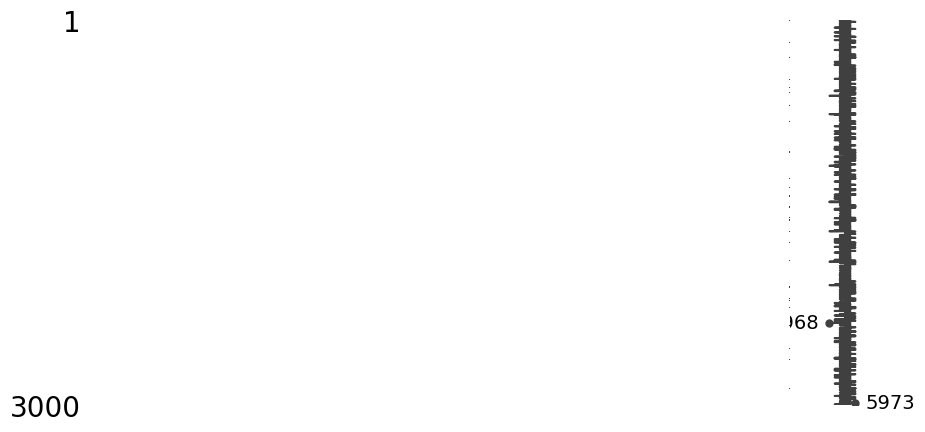

In [ ]:
# Percentage of missing values per column
missing_pct = merged_df.isnull().sum() / len(merged_df) * 100
display(missing_pct.sort_values(ascending=False))

# Visualize missing data
import missingno as msno
msno.matrix(merged_df, figsize=(10,5))
plt.show()

## **3.3 Outlier and distribution check**

aaron: 11 outliers


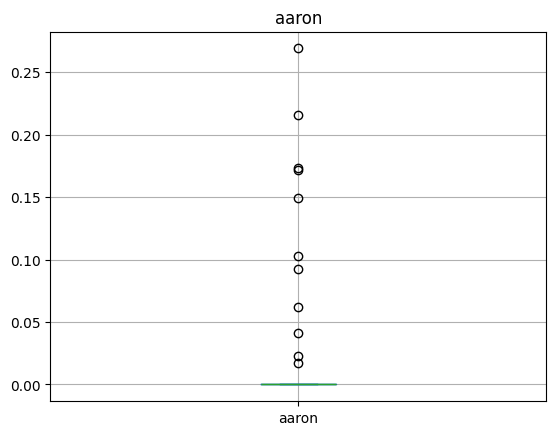

ab: 14 outliers


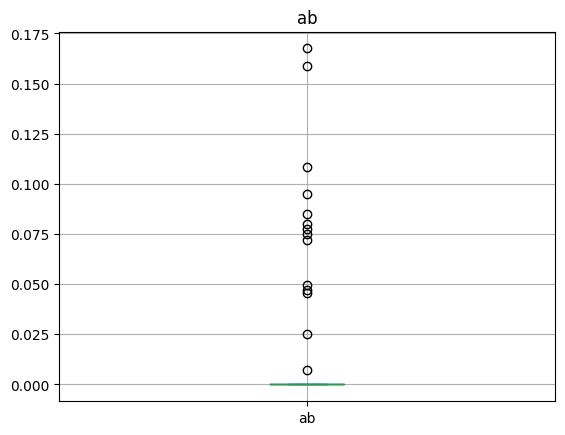

abandon: 14 outliers


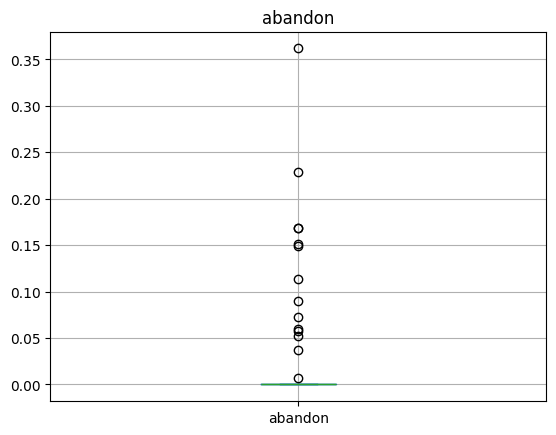

abby: 10 outliers


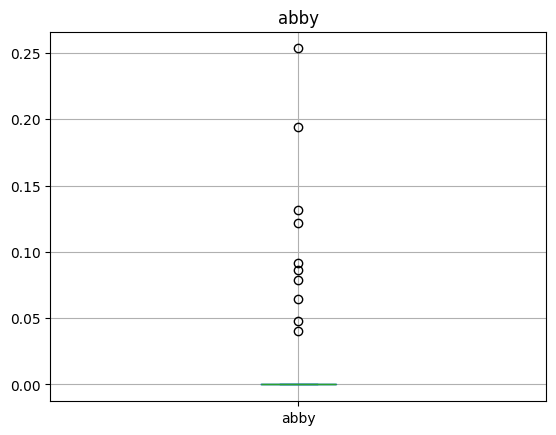

ability: 31 outliers


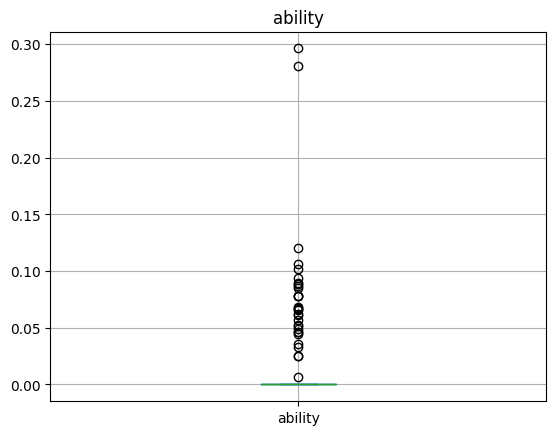

In [ ]:
import matplotlib.pyplot as plt

# Identify numeric columns for outlier analysis
num_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns

# Check only a few columns for visualization
sample_cols = num_cols[:5]  # first 5 columns

for col in sample_cols:
    q1, q3 = merged_df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - 3*iqr, q3 + 3*iqr
    outliers = merged_df[(merged_df[col] < low) | (merged_df[col] > high)][col]
    print(f"{col}: {len(outliers)} outliers")
    merged_df[col].plot.box(title=col, whis=(5,95))
    plt.grid()
    plt.show()

## **3.4 Data Preparation overview**

In [ ]:
# Drop features with excessive missing values (>40%) if any
cols_to_drop = missing_pct[missing_pct > 40].index.tolist()
merged_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Optional: simple imputations for remaining numeric columns
num_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    if merged_df[col].isnull().sum() > 0:
        merged_df[col] = merged_df[col].fillna(merged_df[col].mean())

# Confirm final dataset quality
merged_df.info()
print("Data cleaning complete. Ready for modeling.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 5971 entries, userid to n_tags
dtypes: float64(5965), int64(4), object(2)
memory usage: 136.7+ MB
Data cleaning complete. Ready for modeling.


The merged dataset, combining TF-IDF, GloVe, Longformer, LIWC, and Openness features, contained 3,000 user entries and 5,973 feature columns. Initial inspection confirmed correct data types and structure, with manageable memory usage. Missing value analysis revealed a few high-missing columns such as n_event and n_work, while most linguistic features were complete. Outlier checks showed small but acceptable variations across several features, reflecting natural word frequency differences. Columns with more than 40% missing values were dropped, and simple mean imputation was applied to remaining numeric fields. After cleaning, the dataset retained 5,971 columns, with no missing values and consistent structure, ensuring it is fully prepared for downstream modeling tasks.

In [ ]:
merged_df.shape
merged_df.isnull().sum().sum()
#sanity check

np.int64(0)

# **Part 4: Sentiment Analysis**

## **4.1 Setup and load status data**

In [ ]:
status_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/Status+Updates.csv'
status_df = pd.read_csv(status_path)
print("Status update data loaded successfully:", status_df.shape)
display(status_df.head())


Status update data loaded successfully: (3000, 2)


,userid,message
0,0003e82099f3087d16b301104330547c,"is still pissed that Eminem wasnt in the official Airplanes recording and mv.\tis chillin' like a villain! ""Livah."" - omgpop Repomen ad.\tI thought about putting up a cartoon character as my profi..."
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . please pray for me. :)\tis sending thoughts and prayers out to her dear friend Crystal Long. She lost her husband today due to some heart issues. Please ...
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat but it is a good beat. It is so important to feel needed. I thank God everyday for the students and faculty at Anderson I especially want to thank...
3,002bc06dc29c9ebd31ea3d40d4e13861,"i like it on the floor! :)\ti hope you miss me..just a little bit, so that maybe i have a reason to come back :)\ti came to win\ti really need to work on this thing they call life because right no..."
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start playing Mafia Wars again.\tI love Darth Vader and the force within him!\tI hate when people say dumb stuff just because.\tI have a problem with profe...


## **4.2 Apply TextBlob sentiment**

In [ ]:
from textblob import TextBlob

# Compute Polarity and Subjectivity for each status update
status_df['Polarity'] = status_df['message'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
status_df['Subjectivity'] = status_df['message'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

# Aggregate by userID (mean of all their messages)
sa_tb = status_df.groupby('userid')[['Polarity', 'Subjectivity']].mean().reset_index()
display(sa_tb.head())


,userid,Polarity,Subjectivity
0,0003e82099f3087d16b301104330547c,0.019048,0.514286
1,001494c3b74f124a2e3435fff17f376b,0.327134,0.658176
2,00257e647892d77d5f9b4c33a664e6f7,0.375970,0.597166
3,002bc06dc29c9ebd31ea3d40d4e13861,0.110793,0.615387
4,004ed92354145c51355bd757a0733b1a,0.177180,0.544536


## **4.3. Apply VADER (NLTK) sentiment**

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Compute compound sentiment for each status
status_df['NLTK_Compound'] = status_df['message'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Aggregate by user
sa_vader = status_df.groupby('userid')[['NLTK_Compound']].mean().reset_index()
display(sa_vader.head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,userid,NLTK_Compound
0,0003e82099f3087d16b301104330547c,-0.9848
1,001494c3b74f124a2e3435fff17f376b,1.0000
2,00257e647892d77d5f9b4c33a664e6f7,0.9997
3,002bc06dc29c9ebd31ea3d40d4e13861,0.9961
4,004ed92354145c51355bd757a0733b1a,0.9995


## **4.4 Combine sentiment features**

In [ ]:
# Merge TextBlob and VADER results
sa_final = pd.merge(sa_tb, sa_vader, on='userid', how='inner')
print("Combined Sentiment Analysis dataframe shape:", sa_final.shape)
display(sa_final.head())

# Save to Drive
sa_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/sentiment_analysis.csv'
sa_final.to_csv(sa_path, index=False)
print("Sentiment Analysis results saved to:", sa_path)


Combined Sentiment Analysis dataframe shape: (3000, 4)


,userid,Polarity,Subjectivity,NLTK_Compound
0,0003e82099f3087d16b301104330547c,0.019048,0.514286,-0.9848
1,001494c3b74f124a2e3435fff17f376b,0.327134,0.658176,1.0000
2,00257e647892d77d5f9b4c33a664e6f7,0.375970,0.597166,0.9997
3,002bc06dc29c9ebd31ea3d40d4e13861,0.110793,0.615387,0.9961
4,004ed92354145c51355bd757a0733b1a,0.177180,0.544536,0.9995


Sentiment Analysis results saved to: /content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/sentiment_analysis.csv


Sentiment analysis was performed using both TextBlob and VADER to capture emotional tone and intensity from the status updates. TextBlob provided polarity and subjectivity scores, while VADER produced a compound sentiment value. These features were averaged per user and merged into a single sentiment dataset, which was successfully saved for use in later modeling steps.

# **Part 5: Supervised learning**

# **5.1 Model 1: GloVe (100d) + GradientBoostingClassifier**

## **Step 1: Load and Merge GloVe + Openness Label**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Load GloVe features
glove_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/glove_vectors.csv'
glove_df = pd.read_csv(glove_path)
print("GloVe vectors loaded:", glove_df.shape)

# Load target labels (Openness)
target_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/Openness_w_profile_w_activity.csv'
target_df = pd.read_csv(target_path)
print("Openness labels loaded:", target_df.shape)

# Merge on userid using the binary openness label (ope_hl_bol)
merged_glove = pd.merge(glove_df, target_df[['userid', 'ope_hl_bol']], on='userid', how='inner')
print("Merged dataset shape:", merged_glove.shape)

# Define X and y
X = merged_glove.drop(columns=['userid', 'ope_hl_bol'])
y = merged_glove['ope_hl_bol']


GloVe vectors loaded: (3000, 101)
Openness labels loaded: (3000, 14)
Merged dataset shape: (3000, 102)


## **Step 2: Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Split 80/20 for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Class distribution in y_train:\n", y_train.value_counts(normalize=True))


Training set shape: (2400, 100)
Test set shape: (600, 100)
Class distribution in y_train:
 ope_hl_bol
1    0.5
0    0.5
Name: proportion, dtype: float64


## **Step 3: Gradient Boosting Classifier + Hyperparameter Tuning**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

# Initialize the base model
gb = GradientBoostingClassifier(random_state=42)

# Hyperparameter grid (same structure as lab)
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'subsample': [0.8, 1.0]
}

# Grid Search with 5-fold CV
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Fit model
grid_search.fit(X_train, y_train)

# Best model
best_gb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict and evaluate
y_pred = best_gb.predict(X_test)
y_pred_prob = best_gb.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print("\nGradient Boosting Results (GloVe 100d):")
print("Accuracy:", round(accuracy, 4))
print("AUC:", round(auc, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}

Gradient Boosting Results (GloVe 100d):
Accuracy: 0.65
AUC: 0.6934

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.64      0.65       300
           1       0.65      0.66      0.65       300

    accuracy                           0.65       600
   macro avg       0.65      0.65      0.65       600
weighted avg       0.65      0.65      0.65       600



# **5.2 Longformer model**

## **Step 1: Load Longformer vectors + Openness labels**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.decomposition import PCA

# === Load Longformer features ===
# Use the fixed file instead of the original
longformer_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/longformer_vectors_fixed.csv'
longformer_df = pd.read_csv(longformer_path)
print("Longformer vectors loaded:", longformer_df.shape)

# === Load target labels (Openness) ===
target_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/Openness_w_profile_w_activity.csv'
target_df = pd.read_csv(target_path)
print("Openness labels loaded:", target_df.shape)

# === Merge on userid ===
merged_longformer = pd.merge(longformer_df, target_df[['userid', 'ope_hl_bol']], on='userid', how='inner')
print("Merged dataset shape:", merged_longformer.shape)

# === Define X and y ===
X = merged_longformer.drop(columns=['userid', 'ope_hl_bol'])
y = merged_longformer['ope_hl_bol']


Longformer vectors loaded: (2999, 769)
Openness labels loaded: (3000, 14)
Merged dataset shape: (2999, 770)


## **Step 2: split data into training and split data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (2399, 768)
Test set shape: (600, 768)


## **Step 3: Apply PCA**

In [ ]:
# Reduce to 100 principal components
pca = PCA(n_components=100, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Reduced Longformer feature shape:", X_train_pca.shape)


Reduced Longformer feature shape: (2399, 100)


## **Step 4: Define and tune gradient boosting model**

In [ ]:
# Lighter GridSearchCV for faster runtime
param_grid = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'n_estimators': [100],
    'subsample': [0.8]
}

gb = GradientBoostingClassifier(random_state=42)
grid = GridSearchCV(
    gb,
    param_grid,
    cv=3,           # smaller folds (3 instead of 5)
    scoring='roc_auc',
    n_jobs=-1
)

grid.fit(X_train_pca, y_train)
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test_pca)
y_prob = best_model.predict_proba(X_test_pca)[:, 1]

print("Gradient Boosting (Longformer 100D Reduced) Results")
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Gradient Boosting (Longformer 100D Reduced) Results
Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.635
AUC: 0.6816111111111112

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.64      0.64       300
           1       0.64      0.63      0.63       300

    accuracy                           0.64       600
   macro avg       0.64      0.64      0.63       600
weighted avg       0.64      0.64      0.63       600



## **Step 5: Train with PCA reduced features**

In [ ]:
gb_pca = GridSearchCV(GradientBoostingClassifier(random_state=42),
                      param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
gb_pca.fit(X_train_pca, y_train)

y_pred_pca = gb_pca.predict(X_test_pca)
y_prob_pca = gb_pca.predict_proba(X_test_pca)[:, 1]

acc_pca = accuracy_score(y_test, y_pred_pca)
auc_pca = roc_auc_score(y_test, y_prob_pca)

print("\n PCA-Reduced Longformer Model Results")
print("Best Parameters:", gb_pca.best_params_)
print("Accuracy:", round(acc_pca, 4))
print("AUC:", round(auc_pca, 4))



 PCA-Reduced Longformer Model Results
Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.635
AUC: 0.6816


Compared to the GloVe model (Accuracy = 0.65, AUC = 0.6934), the Longformer (Accuracy = 0.635, AUC = 0.6816) performed slightly lower. This suggests that while contextual embeddings capture richer linguistic nuance, the simpler GloVe vectors generalized marginally better on the given dataset.

# **5.3 knowledge-driven model (LIWC + SA)**

## **Step 1: Load LIWC, Sentiment, and Target files**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# === Load LIWC features ===
liwc_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/LIWC.csv'
liwc_df = pd.read_csv(liwc_path)
print("LIWC data loaded:", liwc_df.shape)

# === Load Sentiment Analysis results ===
sa_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/sentiment_analysis.csv'
sa_df = pd.read_csv(sa_path)
print("Sentiment Analysis data loaded:", sa_df.shape)

# === Load target labels (Openness) ===
target_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/Openness_w_profile_w_activity.csv'
target_df = pd.read_csv(target_path)
print("Openness labels loaded:", target_df.shape)

# === Merge datasets on userid ===
merged_liwc_sa = liwc_df.merge(sa_df, on='userid', how='inner') \
                        .merge(target_df[['userid', 'ope_hl_bol']], on='userid', how='inner')

print("Merged dataset shape:", merged_liwc_sa.shape)
merged_liwc_sa.head()


LIWC data loaded: (3000, 93)
Sentiment Analysis data loaded: (3000, 4)
Openness labels loaded: (3000, 14)
Merged dataset shape: (3000, 97)


,userid,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function.,pronoun,...,Exclam,Dash,Quote,Apostro,Parenth,OtherP,Polarity,Subjectivity,NLTK_Compound,ope_hl_bol
0,8f9d4ed5d16ed1a67d734196d29d1f6b,79.76,49.84,49.65,57.18,12.59,18.03,75.41,44.85,10.62,...,1.46,0.81,1.05,1.74,0.41,0.93,0.130779,0.433735,0.6520,1
1,325e62f4e7e4f64a03fcf831a8d80bf1,32.33,40.50,57.82,80.53,9.39,13.53,91.90,56.25,16.76,...,1.92,0.14,0.00,1.10,0.00,0.07,0.149111,0.566709,0.9618,1
2,d9d94cb467090189a08fb103b9cd5a0c,81.87,40.83,80.19,86.26,7.69,15.99,85.10,43.14,10.23,...,7.07,0.37,0.79,1.75,0.25,0.44,0.068990,0.544683,0.9611,0
3,a7637e86876374b952f4d10d0513c350,63.11,53.43,72.23,72.35,9.00,14.59,83.71,47.35,12.71,...,2.80,1.75,1.00,2.87,1.42,1.28,0.271039,0.637819,0.9995,1
4,c5898ecc4c7407e6f07cc3485073d3a6,85.73,60.94,23.37,18.00,12.84,22.80,72.31,40.05,8.69,...,0.57,1.67,2.12,2.98,0.98,2.28,0.053130,0.423152,-0.9635,1


## **Step 2: Define Features (X) and Target (y)**

In [ ]:
# Drop non-feature columns
X = merged_liwc_sa.drop(columns=['userid', 'ope_hl_bol'])
y = merged_liwc_sa['ope_hl_bol']

print("Feature matrix shape:", X.shape)
print("Target distribution:\n", y.value_counts(normalize=True))


Feature matrix shape: (3000, 95)
Target distribution:
 ope_hl_bol
1    0.5
0    0.5
Name: proportion, dtype: float64


## **Step 3: Split into Train/Test Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (2400, 95)
Test set: (600, 95)


## **Step 4: Gradient Boosting with Hyperparameter Tuning**

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 200],
    'max_depth': [3, 4],
    'subsample': [0.8, 1.0]
}

gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("\nBest Parameters:", grid_search.best_params_)
print("\nGradient Boosting Results (LIWC + SA):")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("AUC:", round(roc_auc_score(y_test, y_pred_proba), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}

Gradient Boosting Results (LIWC + SA):
Accuracy: 0.633
AUC: 0.697

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.60      0.62       300
           1       0.62      0.67      0.65       300

    accuracy                           0.63       600
   macro avg       0.63      0.63      0.63       600
weighted avg       0.63      0.63      0.63       600



## **Step 5 : Feature Selection**

In [ ]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop Features:\n", feature_importances.head(10))



Top Features:
         Feature  Importance
73        death    0.073609
40      insight    0.037631
63  focusfuture    0.034469
35       family    0.028617
5        Sixltr    0.027362
46      percept    0.021421
85        QMark    0.021219
53       sexual    0.020844
15        ipron    0.020363
52       health    0.019145


# **5.4 Hybrid model- Classification Model**

## **Step 1: Load all inputs**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# === Load Longformer vectors ===
longformer_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/longformer_vectors.csv'
longformer_df = pd.read_csv(longformer_path)
print("Longformer vectors loaded:", longformer_df.shape)

# === Load LIWC features ===
liwc_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/LIWC.csv'
liwc_df = pd.read_csv(liwc_path)
print("LIWC data loaded:", liwc_df.shape)

# === Load Sentiment Analysis results ===
sa_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/outputs/sentiment_analysis.csv'
sa_df = pd.read_csv(sa_path)
print("Sentiment data loaded:", sa_df.shape)

# === Load user characteristics & activity ===
activity_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/Openness_w_profile_w_activity.csv'
activity_df = pd.read_csv(activity_path)
print("User characteristics loaded:", activity_df.shape)


Longformer vectors loaded: (2999, 769)
LIWC data loaded: (3000, 93)
Sentiment data loaded: (3000, 4)
User characteristics loaded: (3000, 14)


## **Step 2: Merge All on userid**

In [ ]:
# Add the userid column back to Longformer
# The first column is actually the user ID
longformer_df = longformer_df.rename(columns={longformer_df.columns[0]: 'userid'})
print("Renamed first column to 'userid'")

# Now merge all data sources
merged_all = (
    longformer_df
    .merge(liwc_df, on='userid', how='inner')
    .merge(sa_df, on='userid', how='inner')
    .merge(activity_df[['userid', 'ope_hl_bol', 'age', 'gender', 'n_like', 'n_status',
                        'n_event', 'n_group', 'n_work', 'n_education', 'n_tags']],
           on='userid', how='inner')
)

print("Merged dataset shape:", merged_all.shape)
merged_all.head()


Renamed first column to 'userid'
Merged dataset shape: (2999, 874)


,userid,0.044640146,-0.016596613,0.04830934,-0.07651174,-0.027857283,0.021421453,0.06823565,-0.01351079,0.077719,...,ope_hl_bol,age,gender,n_like,n_status,n_event,n_group,n_work,n_education,n_tags
0,001494c3b74f124a2e3435fff17f376b,0.114587,0.052565,0.034979,0.060796,0.279727,0.078185,0.030835,-0.038139,0.110730,...,1,25,1,88.0,295.0,NaN,181.0,3.0,3.0,541.0
1,00257e647892d77d5f9b4c33a664e6f7,0.089833,-0.008659,-0.003381,0.020187,0.267214,0.160724,0.074655,0.015435,0.122620,...,0,51,0,22.0,86.0,NaN,10.0,2.0,4.0,NaN
2,002bc06dc29c9ebd31ea3d40d4e13861,0.064261,-0.038015,0.042876,-0.038268,0.174284,-0.073775,0.023825,0.069061,0.123160,...,1,19,1,332.0,197.0,7.0,4.0,NaN,1.0,269.0
3,004ed92354145c51355bd757a0733b1a,0.038510,0.055856,0.046649,-0.136475,-0.038455,0.068675,0.029975,0.050439,0.023593,...,1,28,1,178.0,583.0,NaN,NaN,1.0,NaN,77.0
4,0063097663b7eb8d5849a6165737d717,0.055678,-0.077917,0.006863,0.072864,0.001898,-0.056612,0.024474,0.001928,0.116014,...,0,24,0,10.0,75.0,NaN,31.0,NaN,5.0,1.0


## **Step 3: Define x and y**

In [ ]:
# Drop non-feature columns
X = merged_all.drop(columns=['userid', 'ope_hl_bol'])
y = merged_all['ope_hl_bol']

print("Feature matrix shape:", X.shape)
print("Target distribution:\n", y.value_counts(normalize=True))


Feature matrix shape: (2999, 872)
Target distribution:
 ope_hl_bol
0    0.500167
1    0.499833
Name: proportion, dtype: float64


## **Step 4: Split Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (2399, 872)
Test set: (600, 872)


## **Step 5: Train Gradient Boosting (Same Parameter Grid)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install gensim
!pip install numpy pandas scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 24.6 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

gb = GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=100,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
y_pred_prob = gb.predict_proba(X_test)[:, 1]

print("\nHybrid Model (Longformer + LIWC + SA + User):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_prob))
print("Classification Report:\n", classification_report(y_test, y_pred))




Hybrid Model (Longformer + LIWC + SA + User):
Accuracy: 0.6433333333333333
AUC: 0.7169666666666668
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.66      0.65       300
           1       0.65      0.62      0.64       300

    accuracy                           0.64       600
   macro avg       0.64      0.64      0.64       600
weighted avg       0.64      0.64      0.64       600



# **Part 6: Unsupervised Learning— Topic Modeling (LDA)**

## **Step 1 — Load & Sample Data**

In [ ]:
import pandas as pd

# Load status updates
status_path = '/content/drive/MyDrive/IST322_TakeHome_Rohini/Status+Updates.csv'
status_df = pd.read_csv(status_path)

# Quick preview
print(status_df.head())

# Sample 500 rows for faster modeling
sampled_df = status_df.sample(500, random_state=42)
print("Sampled dataset shape:", sampled_df.shape)


                             userid  \
0  0003e82099f3087d16b301104330547c   
1  001494c3b74f124a2e3435fff17f376b   
2  00257e647892d77d5f9b4c33a664e6f7   
3  002bc06dc29c9ebd31ea3d40d4e13861   
4  004ed92354145c51355bd757a0733b1a   

                                                                                                                                                                                                   message  
0  is still pissed that Eminem wasnt in the official Airplanes recording and mv.\tis chillin' like a villain! "Livah." - omgpop Repomen ad.\tI thought about putting up a cartoon character as my profi...  
1  is singing today and is a little nurvous . please pray for me. :)\tis sending thoughts and prayers out to her dear friend Crystal Long. She lost her husband today due to some heart issues. Please ...  
2  I had a wonderful day at Anderson  I am  beat but it is a good beat. It is so important to feel needed.  I thank  God everyday for the students and

## **Step 2 — Preprocess Text**

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())
    tokens = [w for w in text.split() if len(w) > 2 and w not in stop_words]
    return ' '.join(tokens)

sampled_df['clean_text'] = sampled_df['message'].apply(clean_text)
print(sampled_df[['message', 'clean_text']].head())



                                                                                                                                                                                                      message  \
1801  I hate Sam and Mitch, thats fucked up messing with my status.  Disappointed in the butterfly gang.  Dont steal my soap\ti gotta fix my sleeping schedule\tI wish nachos could be delivered to me\tI ...   
1190  I have missed all my facebook friends.  Been to busy with school to get on....and other things.....;)\tI think if I get past the first four periods today I will be fine! LOL!  After 6th period (th...   
1817  i have never seen so many nicely dressed people at one place in my life.... til i went to the golden corral... !\tI love ashley as a viking!!\tI am so sore and tired.... Got to love good weather a...   
251   i hate it wen i fight with u...i hate it wen i hurt u........................but i hate d most wen i kno i still love u....................?\tI give it all up

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Step 3 — Create Dictionary and Corpus**

In [ ]:
!pip install gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 23.0 MB/s eta 0:00:00


In [ ]:
from gensim import corpora
from gensim.utils import simple_preprocess

texts = [simple_preprocess(str(doc)) for doc in sampled_df['clean_text']]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

print(f"Dictionary size: {len(dictionary)} words")


Dictionary size: 17546 words


## **Step 4 — Build 3 LDA Models**

In [ ]:
from gensim.models.ldamodel import LdaModel

lda_models = {}
for k in [3, 5, 7]:
    lda = LdaModel(corpus=corpus,
                   id2word=dictionary,
                   num_topics=k,
                   passes=5,
                   random_state=42,
                   chunksize=100)
    lda_models[k] = lda
    print(f"\nLDA model with {k} topics trained.")



LDA model with 3 topics trained.

LDA model with 5 topics trained.

LDA model with 7 topics trained.


## **Step 5 — Evaluate with Coherence Score**

In [ ]:
from gensim.models import CoherenceModel

for k, lda in lda_models.items():
    coherence_model = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()
    print(f"Coherence Score for {k} topics: {coherence:.3f}")


Coherence Score for 3 topics: 0.282
Coherence Score for 5 topics: 0.402
Coherence Score for 7 topics: 0.462


## **Step 6 — Display Top Words per Topic**

In [ ]:
from gensim.models.ldamodel import LdaModel

lda_3 = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, random_state=42, passes=5)
lda_5 = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42, passes=5)
lda_7 = LdaModel(corpus=corpus, id2word=dictionary, num_topics=7, random_state=42, passes=5)



In [ ]:
for i, topic in lda_3.show_topics(formatted=False, num_words=10):
    words = [w for w, p in topic]
    print(f"Topic {i+1}: {', '.join(words)}")


for i, topic in lda_5.show_topics(formatted=False, num_words=10):
    words = [w for w, p in topic]
    print(f"Topic {i+1}: {', '.join(words)}")

In [ ]:
best_k = max(lda_models, key=lambda k: CoherenceModel(model=lda_models[k], texts=texts, dictionary=dictionary, coherence='c_v').get_coherence())
best_lda = lda_models[best_k]

print(f"\nBest Model has {best_k} topics.\n")

for i, topic in best_lda.show_topics(formatted=False, num_words=10):
    words = [w for w, p in topic]
    print(f"Topic {i+1}: {', '.join(words)}")



Best Model has 7 topics.

Topic 1: drivers, ppl, grandma, luv, dat, cnt, coz, frm, abt, morrow
Topic 2: colors, amber, held, jag, failure, conference, allergies, werent, hired, memphis
Topic 3: transgender, lesbian, bisexual, gay, coming, states, equality, donate, clicking, national
Topic 4: jack, bak, tucson, tha, soooooo, regret, pacific, banana, fotos, gna
Topic 5: love, like, dont, get, want, think, know, hate, going, really
Topic 6: going, repost, new, back, day, country, weekend, yay, finally, semester
Topic 7: miss, really, need, watching, irish, help, london, lvl, law, ipad
